<a href="https://colab.research.google.com/github/mab2004/Skin-Cancer-Classifier-ResNet50/blob/main/Skin_Cancer_Classifier_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Unzip the folder
!unzip dataset.zip

Found 2239 files belonging to 9 classes.
Found 118 files belonging to 9 classes.
Detected 9 classes: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


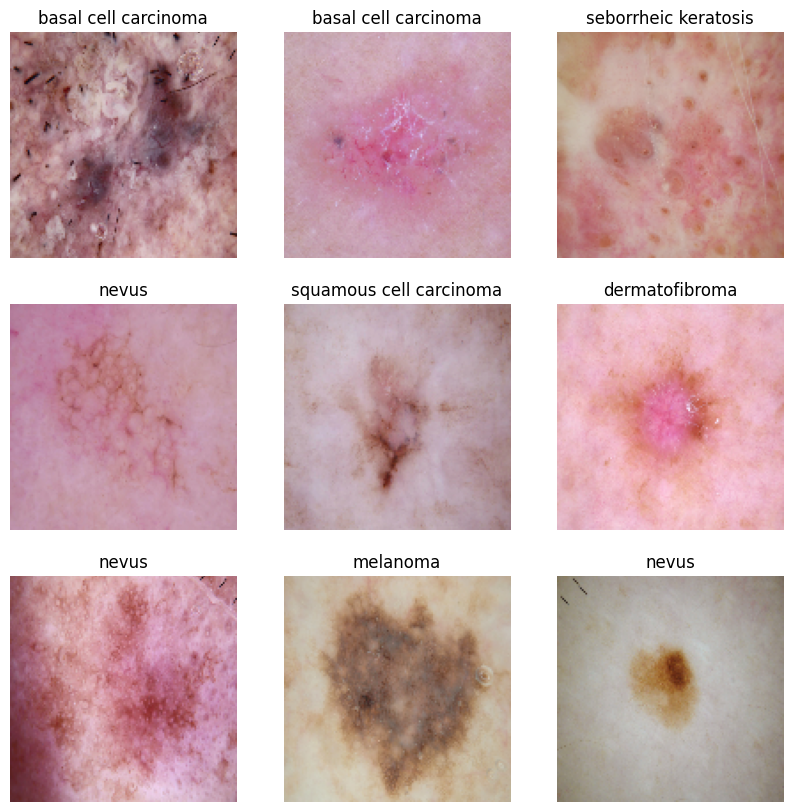

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# Define the paths to your training and testing data directories
train_dir = 'dataset/Train'
test_dir = 'dataset/Test'

# Load the training dataset
train_ds = image_dataset_from_directory(
    train_dir,
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)

# Load the testing dataset
test_ds = image_dataset_from_directory(
    test_dir,
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)

# Get the list of class names to use for the final layer
class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Detected {num_classes} classes: {class_names}")

# --- Optional: Display a few images to verify data loading ---
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # Display the image as a uint8 array for correct visualization
        plt.imshow(images[i].numpy().astype("uint8"))
        # Get the class name from the one-hot encoded label
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")
plt.show()

In [ ]:

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the ResNet50 model, pre-trained on ImageNet
# We use `include_top=False` to remove the original classification layer.
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers of the base model so their weights are not updated during training
base_model.trainable = False

# Add new layers for our classification task
x = base_model.output
x = GlobalAveragePooling2D()(x) # Flattens the output of the base model
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x) # Final classification layer

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Display the model's architecture
model.summary()

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10 # You can increase this number to potentially improve accuracy
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 39s 375ms/step - accuracy: 0.3835 - loss: 2.0012 - val_accuracy: 0.4153 - val_loss: 1.9116
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 244ms/step - accuracy: 0.6468 - loss: 1.0189 - val_accuracy: 0.4153 - val_loss: 1.9894
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 229ms/step - accuracy: 0.7239 - loss: 0.7679 - val_accuracy: 0.3729 - val_loss: 2.2329
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 243ms/step - accuracy: 0.7663 - loss: 0.6322 - val_accuracy: 0.4492 - val_loss: 2.1616
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 244ms/step - accuracy: 0.8199 - loss: 0.5097 - val_accuracy: 0.4153 - val_loss: 2.7354
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 243ms/step - accuracy: 0.8401 - loss: 0.4280 - val_accuracy: 0.4237 - val_loss: 2.5857
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 228ms/step - accuracy: 0.8678 - loss: 0.3434 - val_accuracy: 0.4153 - val_loss: 2.7115
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 213ms/step - accuracy: 0.8819 - loss: 0.3035 - val_accu


--- Evaluating the model on the test data ---
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 570ms/step - accuracy: 0.4375 - loss: 3.0340
Final Test Loss: 2.8345
Final Test Accuracy: 0.4661


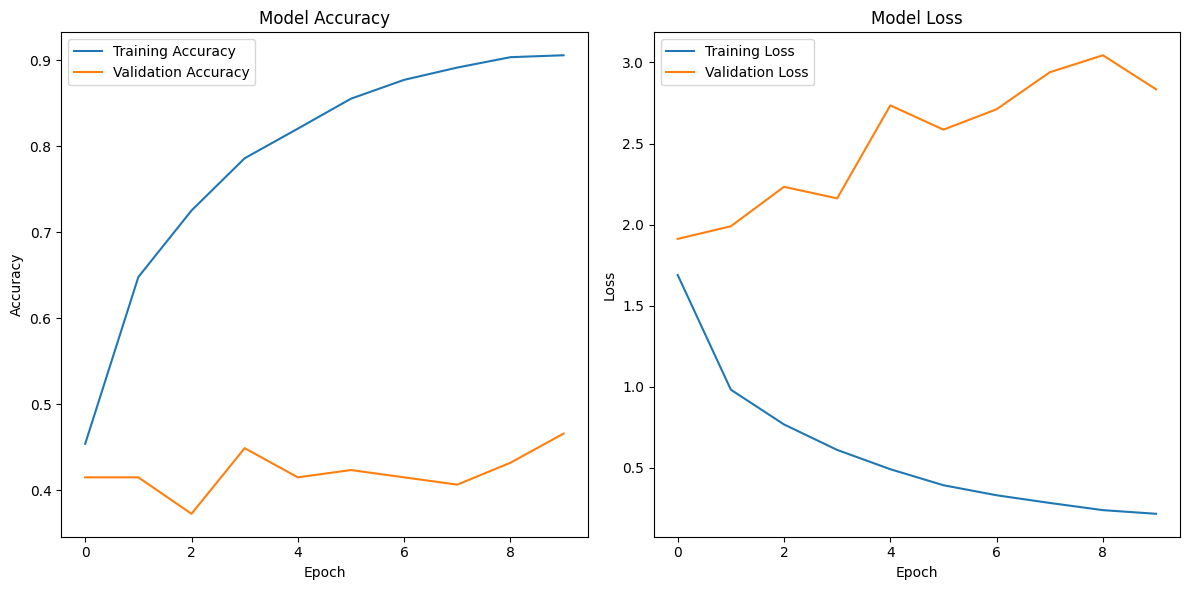

In [5]:
import matplotlib.pyplot as plt

# Evaluate the model on the test dataset to get final performance metrics
print("\n--- Evaluating the model on the test data ---")
loss, accuracy = model.evaluate(test_ds)
print(f"Final Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy:.4f}")

# Plotting the training history for accuracy and loss
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()